contact me @s.goswami2323@gmail.com for any modification/query. Thanks!

## What is Code Doing?

The data given is month-wise Households and volume of each product for each state.Each state being one tabe of excel. The code is reading each tab of data present in Excel and then getting the volume of product only and removing the households. Finally its clubbing all the states data from each tab and getting all the data in format of "Month","State","Product","Quantity". 

##### At the end we get the below things with the code:
1) All states in one column, thats previously present in different tabs.

2) All the products in one column, thats present as different columns

3) Quantity becomes my another column, Quantity per month per product becomes one row. 

4) Date stays as another column.

                 ---- The code is doing above activities for the existing data and for the prediction required data(which is present from row 80. It is then saving the existing data as Train data and prediction required data as Test data
                        
                        
## Why is it doing so?

-- All states in one column would allow me to use this as one Explanatory Variable in training data

-- All products in one column again would help me to use this as one Explanatory Variable in training data

-- Dates in one column again would allow us to see if there is any seaonality or time wise variation on volume of products. So this is another column that can be used as Explanatory Variable.

-- All Volumes in another column would help us getting the Target Variable as one column so this can be the Y variable for my prediction

-- All tabs are clubbed so we can use several attributes present like state, product etc as explanatory variables

---- One line explanation: we are processing the data to achieve Train and Test data. The train data can be used to train the ML Algo. This trained ML Algo can be used to predict the test data.


My take: We can use Regression to predict the volumes since my Traget Variable is continuous




### Better way of doing it.

-- the Python preprocessing code shared "data pre processing - SuperStore dataset.ipynb" is taking "105.40113999999994 seconds" whereas the one below is taking "75.78469799999993 seconds". Checked it by running one code right after another and used time.process_time()

-- the Python preprocessing code shared "data pre processing - SuperStore dataset.ipynb" is saving the test data till 2018-11-30 - 2019-10-31 but when I saw the actual data it had till 2019-10-31 for which the prediction is required. Hence, in my code, I have kept till 2019-11-30. 

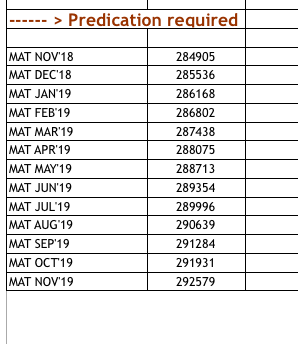


-- I defined most of the processing part as a function and used to get the train and test set. 

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 28 10:18:07 2020

@author: Dexter
"""

import pandas as pd
import numpy as np
import os
##os.chdir("add the link where the superstore data resides")
import time

start_time = time.process_time()


sheet_list = ['Delhi (U)',
 'Punjab_Haryana (U+R)',
 'Rajasthan (U+R)',
 'Uttar Pradesh (U+R)',
 'West Bengal (U+R)',
 'Bihar excl Jharkhand (U+R)',
 'Jharkhand (U+R)',
 'Guwahati (U)',
 'Orissa (U+R)',
 'Maharashtra (U+R)',
 'Gujarat (U+R)',
 'Madhya Pradesh excl Chha (U+R)',
 'Chhattisgarh (U+R)',
 'Tamil Nadu (U+R)',
 'Karnataka (U+R)',
 'Kerala (U+R)',
 'Andhra Pradesh (U+R)']

train1=pd.DataFrame(columns = ['Month','State','Product','Qty'])
test1=pd.DataFrame(columns = ['Month','State','Product','Qty'])

def processing(df,start,i):
    df.columns=['Soap_Bar', 'Shampoo', 'Tooth_Paste', 'Metal_Polish', 'Edible_Oil', 'Washing_Powder', 'Ghee', 'Hair_Oil', 'Biscuits']
    dates=pd.date_range(start=start, periods=len(df), freq='M')
    df=pd.DataFrame(df.stack()).reset_index()
    df.drop(['level_0'],axis=1,inplace=True)
    df.rename(columns={'level_1':'Product',0:'Qty'},inplace=True)
    b=[]
    for t in dates:
        for u in range(0,9):
            b.append(t)
        
    df["Month"]=b
    df["State"]=i.split("(")[0]
    col=df.columns.tolist()
    col=col[-2:]+col[:-2]
    df=df[col]
    
    return df

for i in sheet_list:
    data=pd.read_excel("superstore_data.xlsx",sheet_name= i,header=None)
    train=data.iloc[5:76,15:24]
    test=data.iloc[79:92,15:24]
    
    dt_start='12/1/2012'
    train=processing(train,dt_start,i)
    
    dt_start='11/1/2018'
    test=processing(test,dt_start,i)
    test["Product"]=['Soap_Bar', 'Shampoo', 'Tooth_Paste', 'Metal_Polish', 'Edible_Oil', 'Washing_Powder', 'Ghee', 'Hair_Oil', 'Biscuits']*13
    

    train=pd.concat([train1,train],axis=0)
    test=pd.concat([test1,test],axis=0)
    
    train1=train
    test1=test

    
train.to_csv('SuperStore_train_mod.csv', index = False)
test.to_csv('SuperStore_test_mod.csv', index = False)

    
end_time=time.process_time()
print(start_time, "\n",end_time, "\n",(end_time - start_time), "seconds") 


926.740224 
 1002.524922 
 75.78469799999993 seconds
